# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [40]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [41]:
train, test = keras.datasets.cifar10.load_data()

In [42]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [43]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
def build_mlp(input_shape, output_shape):
    """
    Build your own model
    """
    model = Sequential()
    model.add(Dense(input_shape = input_shape,units = 512 , activation = 'relu'))
    model.add(Dense(units = 256 , activation = 'relu'))
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = 64 , activation = 'relu'))
    model.add(Dense(units = output_shape , activation = 'softmax'))
    return model

In [74]:
## 超參數設定
"""
Set your required experiment parameters
"""
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_size = 256
epochs = 100
op = [keras.optimizers.SGD,keras.optimizers.Adagrad,keras.optimizers.RMSprop,keras.optimizers.Adam]
#SGD = keras.optimizers.SGD(learning_rate = 0.01)
#Adagrad = keras.optimizers.Adagrad(learning_rate = lr)
#RMSprop = keras.optimizers.RMSprop(learning_rate = lr)
#Adam = keras.optimizers.Adam(learning_rate = lr)
#op = [SGD,Adagrad,RMSprop,Adam]


In [48]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr_i in lr:
    keras.backend.clear_session()
    print('experienment ==>'+'(Optimizer:'+'SGD'+')'+'(Learningrate:'+str(lr_i)+')')
    model = build_mlp(input_shape = x_train.shape[1:], output_shape = 10)
    model.summary()
    #opt = keras.optimizers.SGD(learning_rate = learning_rate,momentum = momentum_i,nesterov=nesterov_j)
    SGD = keras.optimizers.SGD(lr = lr_i)
    #Adagrad = keras.optimizers.Adagrad(lr = lr_i)
    #RMSprop = keras.optimizers.RMSprop(lr = lr_i)
    #Adam = keras.optimizers.Adam(lr = lr_i)
    model.compile(loss = 'categorical_crossentropy' , optimizer = SGD, metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
    train_loss = model.history.history['loss']
    train_accuracy = model.history.history['acc']
    valid_loss = model.history.history['val_loss']
    valid_accuracy = model.history.history['val_acc']
    results['experement_Optimizer:'+'SGD'+'_learningrate:'+str(lr_i)] = {'train_loss': train_loss, 'train_accuracy':train_accuracy,'valid_loss': valid_loss, 'valid_accuracy': valid_accuracy}

experienment ==>(Optimizer:SGD)(Learningrate:0.1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [=======

50000/50000 [==============================] - 7s 140us/step - loss: 0.7621 - acc: 0.7296 - val_loss: 1.7352 - val_acc: 0.4889
Epoch 52/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.7381 - acc: 0.7374 - val_loss: 1.9675 - val_acc: 0.4554
Epoch 53/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.7218 - acc: 0.7422 - val_loss: 1.7436 - val_acc: 0.4746
Epoch 54/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.7015 - acc: 0.7501 - val_loss: 1.8308 - val_acc: 0.4983
Epoch 55/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.6924 - acc: 0.7529 - val_loss: 1.7467 - val_acc: 0.5005
Epoch 56/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.6841 - acc: 0.7569 - val_loss: 1.7146 - val_acc: 0.5187
Epoch 57/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.6577 - acc: 0.7660 - val_loss: 1.9945 - val_acc: 0.4810
Epoch 58/100
50000/50000 [=======

Epoch 2/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.9161 - acc: 0.3270 - val_loss: 1.9037 - val_acc: 0.3211
Epoch 3/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.8430 - acc: 0.3506 - val_loss: 1.8148 - val_acc: 0.3489
Epoch 4/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.7914 - acc: 0.3660 - val_loss: 1.8382 - val_acc: 0.3367
Epoch 5/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.7554 - acc: 0.3783 - val_loss: 1.8685 - val_acc: 0.3379
Epoch 6/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.7220 - acc: 0.3917 - val_loss: 1.7125 - val_acc: 0.4013
Epoch 7/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.6957 - acc: 0.4018 - val_loss: 1.8051 - val_acc: 0.3702
Epoch 8/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.6714 - acc: 0.4103 - val_loss: 1.6644 - val_acc: 0.4032
Epoch 9/100
50000/50000 [==

50000/50000 [==============================] - 7s 138us/step - loss: 1.1403 - acc: 0.5975 - val_loss: 1.5667 - val_acc: 0.4649
Epoch 61/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.1232 - acc: 0.6062 - val_loss: 1.4353 - val_acc: 0.5082
Epoch 62/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.1213 - acc: 0.6051 - val_loss: 1.5893 - val_acc: 0.4750
Epoch 63/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.1138 - acc: 0.6081 - val_loss: 1.4776 - val_acc: 0.4827
Epoch 64/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.1062 - acc: 0.6078 - val_loss: 1.3848 - val_acc: 0.5179
Epoch 65/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.1065 - acc: 0.6106 - val_loss: 1.3100 - val_acc: 0.5311
Epoch 66/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.0847 - acc: 0.6194 - val_loss: 1.5649 - val_acc: 0.4548
Epoch 67/100
50000/50000 [=======

Epoch 11/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.9021 - acc: 0.3312 - val_loss: 1.8955 - val_acc: 0.3338
Epoch 12/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.8868 - acc: 0.3364 - val_loss: 1.8814 - val_acc: 0.3407
Epoch 13/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.8729 - acc: 0.3418 - val_loss: 1.8676 - val_acc: 0.3410
Epoch 14/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.8603 - acc: 0.3450 - val_loss: 1.8576 - val_acc: 0.3460
Epoch 15/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.8486 - acc: 0.3494 - val_loss: 1.8452 - val_acc: 0.3526
Epoch 16/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.8374 - acc: 0.3534 - val_loss: 1.8340 - val_acc: 0.3595
Epoch 17/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.8273 - acc: 0.3571 - val_loss: 1.8242 - val_acc: 0.3591
Epoch 18/100
50000/5

50000/50000 [==============================] - 7s 140us/step - loss: 1.5845 - acc: 0.4477 - val_loss: 1.6022 - val_acc: 0.4333
Epoch 70/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.5816 - acc: 0.4477 - val_loss: 1.6028 - val_acc: 0.4307
Epoch 71/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.5789 - acc: 0.4483 - val_loss: 1.5953 - val_acc: 0.4341
Epoch 72/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5762 - acc: 0.4502 - val_loss: 1.5924 - val_acc: 0.4337
Epoch 73/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5733 - acc: 0.4505 - val_loss: 1.5921 - val_acc: 0.4359
Epoch 74/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5699 - acc: 0.4525 - val_loss: 1.5963 - val_acc: 0.4372
Epoch 75/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5678 - acc: 0.4526 - val_loss: 1.5926 - val_acc: 0.4345
Epoch 76/100
50000/50000 [=======

Epoch 20/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.2084 - acc: 0.1911 - val_loss: 2.2066 - val_acc: 0.1945
Epoch 21/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.2046 - acc: 0.1931 - val_loss: 2.2029 - val_acc: 0.1968
Epoch 22/100
50000/50000 [==============================] - 7s 140us/step - loss: 2.2009 - acc: 0.1951 - val_loss: 2.1992 - val_acc: 0.1996
Epoch 23/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.1973 - acc: 0.1977 - val_loss: 2.1955 - val_acc: 0.2007
Epoch 24/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.1937 - acc: 0.1989 - val_loss: 2.1920 - val_acc: 0.2025
Epoch 25/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.1902 - acc: 0.2012 - val_loss: 2.1884 - val_acc: 0.2045
Epoch 26/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.1867 - acc: 0.2016 - val_loss: 2.1849 - val_acc: 0.2059
Epoch 27/100
50000/5

50000/50000 [==============================] - 7s 139us/step - loss: 2.0414 - acc: 0.2729 - val_loss: 2.0388 - val_acc: 0.2788
Epoch 79/100
50000/50000 [==============================] - 7s 144us/step - loss: 2.0391 - acc: 0.2735 - val_loss: 2.0366 - val_acc: 0.2787
Epoch 80/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.0369 - acc: 0.2745 - val_loss: 2.0343 - val_acc: 0.2799
Epoch 81/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.0346 - acc: 0.2754 - val_loss: 2.0321 - val_acc: 0.2798
Epoch 82/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.0324 - acc: 0.2769 - val_loss: 2.0298 - val_acc: 0.2821
Epoch 83/100
50000/50000 [==============================] - 7s 137us/step - loss: 2.0302 - acc: 0.2774 - val_loss: 2.0277 - val_acc: 0.2823
Epoch 84/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.0280 - acc: 0.2781 - val_loss: 2.0255 - val_acc: 0.2827
Epoch 85/100
50000/50000 [=======

50000/50000 [==============================] - 7s 143us/step - loss: 2.2760 - acc: 0.1377 - val_loss: 2.2759 - val_acc: 0.1401
Epoch 29/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.2750 - acc: 0.1404 - val_loss: 2.2750 - val_acc: 0.1429
Epoch 30/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.2741 - acc: 0.1434 - val_loss: 2.2740 - val_acc: 0.1450
Epoch 31/100
50000/50000 [==============================] - 7s 145us/step - loss: 2.2732 - acc: 0.1463 - val_loss: 2.2731 - val_acc: 0.1469
Epoch 32/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2724 - acc: 0.1489 - val_loss: 2.2723 - val_acc: 0.1498
Epoch 33/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2715 - acc: 0.1514 - val_loss: 2.2714 - val_acc: 0.1501
Epoch 34/100
50000/50000 [==============================] - 8s 152us/step - loss: 2.2707 - acc: 0.1533 - val_loss: 2.2706 - val_acc: 0.1522
Epoch 35/100
50000/50000 [=======

50000/50000 [==============================] - 7s 141us/step - loss: 2.2340 - acc: 0.1868 - val_loss: 2.2342 - val_acc: 0.1847
Epoch 87/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.2334 - acc: 0.1870 - val_loss: 2.2336 - val_acc: 0.1850
Epoch 88/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.2328 - acc: 0.1871 - val_loss: 2.2330 - val_acc: 0.1860
Epoch 89/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2321 - acc: 0.1877 - val_loss: 2.2324 - val_acc: 0.1866
Epoch 90/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2315 - acc: 0.1878 - val_loss: 2.2318 - val_acc: 0.1872
Epoch 91/100
50000/50000 [==============================] - 7s 145us/step - loss: 2.2309 - acc: 0.1881 - val_loss: 2.2311 - val_acc: 0.1873
Epoch 92/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2303 - acc: 0.1884 - val_loss: 2.2305 - val_acc: 0.1875
Epoch 93/100
50000/50000 [=======

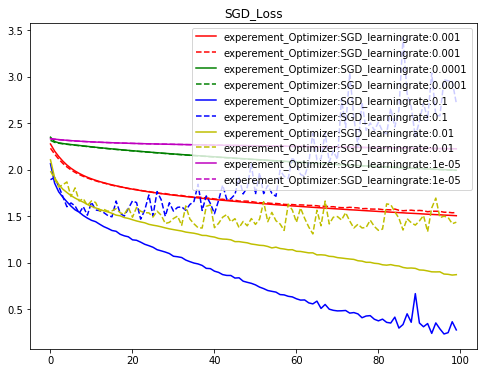

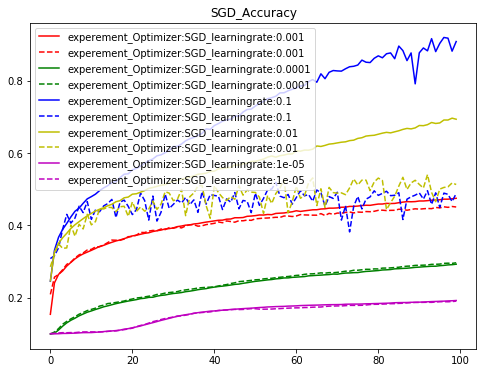

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver" , "magenta", "tomato","tan"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_accuracy'])),results[cond]['train_accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_accuracy'])),results[cond]['valid_accuracy'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Accuracy")
plt.legend()
plt.show()

In [81]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr_i in lr:
    for op_j in op:
        keras.backend.clear_session()
        print('experienment ==>'+'(Optimizer:'+str(op_j)[25:]+')'+'(Learningrate:'+str(lr_i)+')')
        model = build_mlp(input_shape = x_train.shape[1:], output_shape = 10)
        model.summary()
        opt = op_j(lr = lr_i)
        model.compile(loss = 'categorical_crossentropy' , optimizer = opt, metrics = ['accuracy'])
        model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
        train_loss = model.history.history['loss']
        train_accuracy = model.history.history['acc']
        valid_loss = model.history.history['val_loss']
        valid_accuracy = model.history.history['val_acc']
        results['Opt:'+str(op_j)[25:]+'_lr:'+str(lr_i)] = {'train_loss': train_loss, 'train_accuracy':train_accuracy,'valid_loss': valid_loss, 'valid_accuracy': valid_accuracy}

experienment ==>(Optimizer:SGD'>)(Learningrate:0.1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [=====

Epoch 52/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.7367 - acc: 0.7373 - val_loss: 1.9134 - val_acc: 0.4622
Epoch 53/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.7115 - acc: 0.7467 - val_loss: 1.9792 - val_acc: 0.4552
Epoch 54/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.7125 - acc: 0.7454 - val_loss: 1.7515 - val_acc: 0.4795
Epoch 55/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.6960 - acc: 0.7504 - val_loss: 2.0872 - val_acc: 0.4261
Epoch 56/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.6802 - acc: 0.7553 - val_loss: 1.9776 - val_acc: 0.4798
Epoch 57/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.6698 - acc: 0.7610 - val_loss: 2.0317 - val_acc: 0.4747
Epoch 58/100
50000/50000 [==============================] - 7s 143us/step - loss: 0.6642 - acc: 0.7616 - val_loss: 2.0055 - val_acc: 0.4566
Epoch 59/100
50000/5

50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/100
50000/50000 [==============================] - 8s 152us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/100
50000/50000 [

Epoch 60/100
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 10/100
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/100
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/100
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/100
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/100
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/100
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/100
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 68/100
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 69/100
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 70/100
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 71/100
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 72/100
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 73/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 74/100
50000/

50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/100
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/100
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/100
50000/

Epoch 75/100
50000/50000 [==============================] - 9s 183us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 76/100
50000/50000 [==============================] - 9s 184us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 77/100
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 78/100
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 79/100
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 80/100
50000/50000 [==============================] - 9s 183us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 81/100
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 7s 143us/step - loss: 1.4180 - acc: 0.4996 - val_loss: 1.5835 - val_acc: 0.4362
Epoch 26/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.4093 - acc: 0.5033 - val_loss: 1.4816 - val_acc: 0.4687
Epoch 27/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.3970 - acc: 0.5065 - val_loss: 1.4491 - val_acc: 0.4796
Epoch 28/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.3896 - acc: 0.5091 - val_loss: 1.5589 - val_acc: 0.4427
Epoch 29/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.3746 - acc: 0.5137 - val_loss: 1.6230 - val_acc: 0.4200
Epoch 30/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.3675 - acc: 0.5175 - val_loss: 1.6156 - val_acc: 0.4283
Epoch 31/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.3552 - acc: 0.5218 - val_loss: 1.4650 - val_acc: 0.4763
Epoch 32/100
50000/50000 [=======

50000/50000 [==============================] - 7s 144us/step - loss: 0.9785 - acc: 0.6532 - val_loss: 1.4406 - val_acc: 0.5050
Epoch 84/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.9650 - acc: 0.6599 - val_loss: 1.3957 - val_acc: 0.5218
Epoch 85/100
50000/50000 [==============================] - 7s 144us/step - loss: 0.9646 - acc: 0.6606 - val_loss: 1.3649 - val_acc: 0.5330
Epoch 86/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.9549 - acc: 0.6639 - val_loss: 1.4906 - val_acc: 0.4970
Epoch 87/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.9501 - acc: 0.6623 - val_loss: 1.3829 - val_acc: 0.5246
Epoch 88/100
50000/50000 [==============================] - 7s 142us/step - loss: 0.9457 - acc: 0.6657 - val_loss: 1.4740 - val_acc: 0.5017
Epoch 89/100
50000/50000 [==============================] - 7s 141us/step - loss: 0.9401 - acc: 0.6683 - val_loss: 1.4774 - val_acc: 0.4977
Epoch 90/100
50000/50000 [=======

Epoch 34/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.1884 - acc: 0.5800 - val_loss: 1.5228 - val_acc: 0.4803
Epoch 35/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.1761 - acc: 0.5843 - val_loss: 1.3886 - val_acc: 0.5137
Epoch 36/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.1692 - acc: 0.5867 - val_loss: 1.3711 - val_acc: 0.5159
Epoch 37/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.1538 - acc: 0.5928 - val_loss: 1.4240 - val_acc: 0.5003
Epoch 38/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.1523 - acc: 0.5960 - val_loss: 1.4162 - val_acc: 0.5087
Epoch 39/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.1411 - acc: 0.5994 - val_loss: 1.3671 - val_acc: 0.5224
Epoch 40/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.1345 - acc: 0.5999 - val_loss: 1.3931 - val_acc: 0.5180
Epoch 41/100
50000/5

50000/50000 [==============================] - 8s 156us/step - loss: 0.8347 - acc: 0.7124 - val_loss: 1.5014 - val_acc: 0.5192
Epoch 93/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.8327 - acc: 0.7144 - val_loss: 1.5387 - val_acc: 0.5140
Epoch 94/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.8267 - acc: 0.7156 - val_loss: 1.5471 - val_acc: 0.5114
Epoch 95/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.8245 - acc: 0.7164 - val_loss: 1.5181 - val_acc: 0.5198
Epoch 96/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.8179 - acc: 0.7199 - val_loss: 1.5501 - val_acc: 0.5105
Epoch 97/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.8155 - acc: 0.7194 - val_loss: 1.5262 - val_acc: 0.5182
Epoch 98/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.8108 - acc: 0.7232 - val_loss: 1.5585 - val_acc: 0.5105
Epoch 99/100
50000/50000 [=======

50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/

Epoch 100/100
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
experienment ==>(Optimizer:Adam'>)(Learningrate:0.01)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_

Epoch 50/100
50000/50000 [==============================] - 9s 183us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 9s 178us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 9s 178us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.2885 - acc: 0.1262 - val_loss: 2.2587 - val_acc: 0.1575
Epoch 2/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.2392 - acc: 0.1802 - val_loss: 2.2149 - val_acc: 0.2009
Epoch 3/100
50000/50000 [==============================] - 7s 144us/step - loss: 2.1948 - acc: 0.2132 - val_loss: 2.1735 - val_acc: 0.2283
Epoch 4/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.1559 - acc: 0.2319 - val_loss: 2.1375 - val_acc: 0.2448
Epoch 5/100
50000/50000 [==============================] - 7s 149us/step - loss: 2.1213 - acc: 0.2465 - val_loss: 2.1052 - val_acc: 0.2530
Epoch 6/100
50000/50000 [==============================] - 7s 141us/step - loss: 2.0911 - acc: 0.2562 - val_loss: 2.0771 - val_acc: 0.2603
Epoch 7/100
50000/50000 [==============================] - 8s 151us/step - loss: 2.0646 - acc: 0.2669 - val_loss: 2.

50000/50000 [==============================] - 7s 145us/step - loss: 1.6594 - acc: 0.4197 - val_loss: 1.6607 - val_acc: 0.4145
Epoch 60/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6557 - acc: 0.4203 - val_loss: 1.6565 - val_acc: 0.4140
Epoch 61/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6524 - acc: 0.4213 - val_loss: 1.6518 - val_acc: 0.4190
Epoch 62/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6488 - acc: 0.4216 - val_loss: 1.6485 - val_acc: 0.4183
Epoch 63/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.6453 - acc: 0.4237 - val_loss: 1.6469 - val_acc: 0.4222
Epoch 64/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.6422 - acc: 0.4248 - val_loss: 1.6453 - val_acc: 0.4172
Epoch 65/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.6387 - acc: 0.4256 - val_loss: 1.6417 - val_acc: 0.4176
Epoch 66/100
50000/50000 [=======

Epoch 10/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.5491 - acc: 0.4549 - val_loss: 1.6030 - val_acc: 0.4286
Epoch 11/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.5340 - acc: 0.4614 - val_loss: 1.5523 - val_acc: 0.4532
Epoch 12/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.5215 - acc: 0.4668 - val_loss: 1.5498 - val_acc: 0.4506
Epoch 13/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.5089 - acc: 0.4698 - val_loss: 1.5610 - val_acc: 0.4524
Epoch 14/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.4972 - acc: 0.4748 - val_loss: 1.5173 - val_acc: 0.4617
Epoch 15/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.4857 - acc: 0.4784 - val_loss: 1.5087 - val_acc: 0.4681
Epoch 16/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.4756 - acc: 0.4820 - val_loss: 1.5072 - val_acc: 0.4658
Epoch 17/100
50000/5

50000/50000 [==============================] - 8s 160us/step - loss: 1.2146 - acc: 0.5755 - val_loss: 1.3714 - val_acc: 0.5141
Epoch 69/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.2119 - acc: 0.5768 - val_loss: 1.3629 - val_acc: 0.5149
Epoch 70/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.2085 - acc: 0.5776 - val_loss: 1.3581 - val_acc: 0.5192
Epoch 71/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.2059 - acc: 0.5790 - val_loss: 1.3652 - val_acc: 0.5145
Epoch 72/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.2021 - acc: 0.5796 - val_loss: 1.3431 - val_acc: 0.5199
Epoch 73/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.1996 - acc: 0.5807 - val_loss: 1.3425 - val_acc: 0.5226
Epoch 74/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.1967 - acc: 0.5815 - val_loss: 1.3545 - val_acc: 0.5206
Epoch 75/100
50000/50000 [=======

Epoch 19/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.2825 - acc: 0.5397 - val_loss: 1.5036 - val_acc: 0.4781
Epoch 20/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.2663 - acc: 0.5484 - val_loss: 1.6371 - val_acc: 0.4447
Epoch 21/100
50000/50000 [==============================] - 8s 164us/step - loss: 1.2379 - acc: 0.5580 - val_loss: 1.5559 - val_acc: 0.4585
Epoch 22/100
50000/50000 [==============================] - 8s 164us/step - loss: 1.2206 - acc: 0.5638 - val_loss: 1.9171 - val_acc: 0.3956
Epoch 23/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.2107 - acc: 0.5676 - val_loss: 1.5701 - val_acc: 0.4586
Epoch 24/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.1792 - acc: 0.5806 - val_loss: 1.4950 - val_acc: 0.4828
Epoch 25/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.1666 - acc: 0.5803 - val_loss: 1.5467 - val_acc: 0.4739
Epoch 26/100
50000/5

50000/50000 [==============================] - 8s 167us/step - loss: 0.5517 - acc: 0.8013 - val_loss: 2.5437 - val_acc: 0.4935
Epoch 78/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.5493 - acc: 0.8029 - val_loss: 2.7411 - val_acc: 0.4695
Epoch 79/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.5454 - acc: 0.8057 - val_loss: 2.5925 - val_acc: 0.4709
Epoch 80/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.5294 - acc: 0.8113 - val_loss: 2.6069 - val_acc: 0.4780
Epoch 81/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.5259 - acc: 0.8112 - val_loss: 2.6887 - val_acc: 0.4858
Epoch 82/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.5277 - acc: 0.8109 - val_loss: 2.6734 - val_acc: 0.5026
Epoch 83/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.5195 - acc: 0.8156 - val_loss: 2.7735 - val_acc: 0.4728
Epoch 84/100
50000/50000 [=======

50000/50000 [==============================] - 10s 200us/step - loss: 1.0255 - acc: 0.6329 - val_loss: 1.4024 - val_acc: 0.5225
Epoch 28/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.9994 - acc: 0.6417 - val_loss: 1.4284 - val_acc: 0.5226
Epoch 29/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.9748 - acc: 0.6520 - val_loss: 1.4215 - val_acc: 0.5185
Epoch 30/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.9610 - acc: 0.6566 - val_loss: 1.4062 - val_acc: 0.5337
Epoch 31/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.9366 - acc: 0.6637 - val_loss: 1.4690 - val_acc: 0.5283
Epoch 32/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.9336 - acc: 0.6654 - val_loss: 1.4739 - val_acc: 0.5170
Epoch 33/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.9037 - acc: 0.6763 - val_loss: 1.4595 - val_acc: 0.5207
Epoch 34/100
50000/50000 [======

50000/50000 [==============================] - 9s 186us/step - loss: 0.3839 - acc: 0.8612 - val_loss: 2.6812 - val_acc: 0.4977
Epoch 86/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.3986 - acc: 0.8557 - val_loss: 2.7681 - val_acc: 0.4992
Epoch 87/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.3784 - acc: 0.8636 - val_loss: 2.6873 - val_acc: 0.4960
Epoch 88/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.3527 - acc: 0.8738 - val_loss: 2.7479 - val_acc: 0.5035
Epoch 89/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.3678 - acc: 0.8680 - val_loss: 2.6840 - val_acc: 0.5041
Epoch 90/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.3477 - acc: 0.8752 - val_loss: 2.7953 - val_acc: 0.4970
Epoch 91/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.3446 - acc: 0.8762 - val_loss: 2.7860 - val_acc: 0.5038
Epoch 92/100
50000/50000 [=======

Epoch 36/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.1019 - acc: 0.2440 - val_loss: 2.1012 - val_acc: 0.2474
Epoch 37/100
50000/50000 [==============================] - 7s 138us/step - loss: 2.0982 - acc: 0.2449 - val_loss: 2.0975 - val_acc: 0.2490
Epoch 38/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.0945 - acc: 0.2463 - val_loss: 2.0939 - val_acc: 0.2515
Epoch 39/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.0909 - acc: 0.2489 - val_loss: 2.0903 - val_acc: 0.2527
Epoch 40/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.0874 - acc: 0.2499 - val_loss: 2.0868 - val_acc: 0.2537
Epoch 41/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.0839 - acc: 0.2524 - val_loss: 2.0834 - val_acc: 0.2563
Epoch 42/100
50000/50000 [==============================] - 8s 151us/step - loss: 2.0805 - acc: 0.2531 - val_loss: 2.0800 - val_acc: 0.2586
Epoch 43/100
50000/5

50000/50000 [==============================] - 7s 138us/step - loss: 1.9581 - acc: 0.3064 - val_loss: 1.9583 - val_acc: 0.3130
Epoch 95/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.9565 - acc: 0.3071 - val_loss: 1.9566 - val_acc: 0.3141
Epoch 96/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.9548 - acc: 0.3078 - val_loss: 1.9550 - val_acc: 0.3132
Epoch 97/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.9532 - acc: 0.3089 - val_loss: 1.9534 - val_acc: 0.3138
Epoch 98/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.9516 - acc: 0.3090 - val_loss: 1.9519 - val_acc: 0.3156
Epoch 99/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.9500 - acc: 0.3097 - val_loss: 1.9503 - val_acc: 0.3162
Epoch 100/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.9484 - acc: 0.3103 - val_loss: 1.9487 - val_acc: 0.3169
experienment ==>(Optimizer:Adagr

Epoch 45/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.6472 - acc: 0.4286 - val_loss: 1.6580 - val_acc: 0.4259
Epoch 46/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.6455 - acc: 0.4286 - val_loss: 1.6553 - val_acc: 0.4251
Epoch 47/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.6436 - acc: 0.4299 - val_loss: 1.6544 - val_acc: 0.4275
Epoch 48/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.6417 - acc: 0.4305 - val_loss: 1.6523 - val_acc: 0.4288
Epoch 49/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.6401 - acc: 0.4307 - val_loss: 1.6512 - val_acc: 0.4274
Epoch 50/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.6385 - acc: 0.4314 - val_loss: 1.6491 - val_acc: 0.4285
Epoch 51/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6368 - acc: 0.4321 - val_loss: 1.6480 - val_acc: 0.4297
Epoch 52/100
50000/5

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 166us/step - loss: 2.0149 - acc: 0.2764 - val_loss: 1.8962 - val_acc: 0.3213
Epoch 2/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.8358 - acc: 0.3469 - val_loss: 1.8595 - val_acc: 0.3305
Epoch 3/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.7532 - acc: 0.3776 - val_loss: 1.8180 - val_acc: 0.3546
Epoch 4/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.7005 - acc: 0.3969 - val_loss: 1.7487 - val_acc: 0.3906
Epoch 5/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.6508 - acc: 0.4143 - val_loss: 1.6817 - val_acc: 0.3912
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6126 - acc: 0.4300 - val_loss: 1.5989 - val_acc: 0.4366
Epoch 7/100
50000/50000 [==============================] - 8s 163us/step - loss: 1.5810 - acc: 0.4419 - val_loss: 1.

50000/50000 [==============================] - 9s 171us/step - loss: 0.8845 - acc: 0.6903 - val_loss: 1.4993 - val_acc: 0.5062
Epoch 60/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.8739 - acc: 0.6957 - val_loss: 1.4286 - val_acc: 0.5234
Epoch 61/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.8672 - acc: 0.6978 - val_loss: 1.4079 - val_acc: 0.5332
Epoch 62/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.8560 - acc: 0.7027 - val_loss: 1.6279 - val_acc: 0.4884
Epoch 63/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.8484 - acc: 0.7059 - val_loss: 1.4563 - val_acc: 0.5199
Epoch 64/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.8347 - acc: 0.7095 - val_loss: 1.4575 - val_acc: 0.5226
Epoch 65/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.8270 - acc: 0.7143 - val_loss: 1.4328 - val_acc: 0.5364
Epoch 66/100
50000/50000 [=======

Epoch 10/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.3941 - acc: 0.5076 - val_loss: 1.4235 - val_acc: 0.4892
Epoch 11/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.3713 - acc: 0.5158 - val_loss: 1.4118 - val_acc: 0.4966
Epoch 12/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.3466 - acc: 0.5260 - val_loss: 1.4434 - val_acc: 0.4913
Epoch 13/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.3261 - acc: 0.5316 - val_loss: 1.4102 - val_acc: 0.5025
Epoch 14/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.3180 - acc: 0.5363 - val_loss: 1.3893 - val_acc: 0.5060
Epoch 15/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.2906 - acc: 0.5450 - val_loss: 1.3717 - val_acc: 0.5135
Epoch 16/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.2742 - acc: 0.5492 - val_loss: 1.3868 - val_acc: 0.5041
Epoch 17/100
50000/5

50000/50000 [==============================] - 9s 190us/step - loss: 0.6376 - acc: 0.7798 - val_loss: 1.5433 - val_acc: 0.5349
Epoch 69/100
50000/50000 [==============================] - 10s 191us/step - loss: 0.6197 - acc: 0.7864 - val_loss: 1.5290 - val_acc: 0.5419
Epoch 70/100
50000/50000 [==============================] - 10s 200us/step - loss: 0.6178 - acc: 0.7864 - val_loss: 1.5688 - val_acc: 0.5315
Epoch 71/100
50000/50000 [==============================] - 9s 188us/step - loss: 0.6050 - acc: 0.7918 - val_loss: 1.5624 - val_acc: 0.5347
Epoch 72/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.5865 - acc: 0.7996 - val_loss: 1.5723 - val_acc: 0.5348
Epoch 73/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.5785 - acc: 0.8024 - val_loss: 1.5925 - val_acc: 0.5270
Epoch 74/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.5777 - acc: 0.8014 - val_loss: 1.5705 - val_acc: 0.5379
Epoch 75/100
50000/50000 [=====

50000/50000 [==============================] - 8s 159us/step - loss: 2.3193 - acc: 0.1157 - val_loss: 2.3188 - val_acc: 0.1166
Epoch 19/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.3180 - acc: 0.1166 - val_loss: 2.3176 - val_acc: 0.1168
Epoch 20/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.3168 - acc: 0.1172 - val_loss: 2.3164 - val_acc: 0.1176
Epoch 21/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.3157 - acc: 0.1177 - val_loss: 2.3153 - val_acc: 0.1181
Epoch 22/100
50000/50000 [==============================] - 7s 149us/step - loss: 2.3146 - acc: 0.1185 - val_loss: 2.3141 - val_acc: 0.1187
Epoch 23/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.3135 - acc: 0.1190 - val_loss: 2.3131 - val_acc: 0.1190
Epoch 24/100
50000/50000 [==============================] - 7s 145us/step - loss: 2.3124 - acc: 0.1196 - val_loss: 2.3120 - val_acc: 0.1197
Epoch 25/100
50000/50000 [=======

50000/50000 [==============================] - 9s 185us/step - loss: 2.2782 - acc: 0.1496 - val_loss: 2.2781 - val_acc: 0.1489
Epoch 77/100
50000/50000 [==============================] - 7s 144us/step - loss: 2.2778 - acc: 0.1497 - val_loss: 2.2776 - val_acc: 0.1491
Epoch 78/100
50000/50000 [==============================] - 8s 167us/step - loss: 2.2774 - acc: 0.1502 - val_loss: 2.2772 - val_acc: 0.1489
Epoch 79/100
50000/50000 [==============================] - 10s 195us/step - loss: 2.2769 - acc: 0.1504 - val_loss: 2.2768 - val_acc: 0.1493
Epoch 80/100
50000/50000 [==============================] - 10s 201us/step - loss: 2.2765 - acc: 0.1509 - val_loss: 2.2764 - val_acc: 0.1497
Epoch 81/100
50000/50000 [==============================] - 10s 200us/step - loss: 2.2761 - acc: 0.1510 - val_loss: 2.2759 - val_acc: 0.1500
Epoch 82/100
50000/50000 [==============================] - 7s 143us/step - loss: 2.2756 - acc: 0.1511 - val_loss: 2.2755 - val_acc: 0.1511
Epoch 83/100
50000/50000 [====

50000/50000 [==============================] - 8s 157us/step - loss: 2.0701 - acc: 0.2674 - val_loss: 2.0698 - val_acc: 0.2700
Epoch 27/100
50000/50000 [==============================] - 8s 156us/step - loss: 2.0674 - acc: 0.2676 - val_loss: 2.0672 - val_acc: 0.2716
Epoch 28/100
50000/50000 [==============================] - 8s 159us/step - loss: 2.0649 - acc: 0.2695 - val_loss: 2.0647 - val_acc: 0.2717
Epoch 29/100
50000/50000 [==============================] - 8s 159us/step - loss: 2.0624 - acc: 0.2694 - val_loss: 2.0623 - val_acc: 0.2727
Epoch 30/100
50000/50000 [==============================] - 8s 157us/step - loss: 2.0600 - acc: 0.2714 - val_loss: 2.0600 - val_acc: 0.2731
Epoch 31/100
50000/50000 [==============================] - 8s 157us/step - loss: 2.0577 - acc: 0.2721 - val_loss: 2.0577 - val_acc: 0.2737
Epoch 32/100
50000/50000 [==============================] - 8s 158us/step - loss: 2.0555 - acc: 0.2730 - val_loss: 2.0556 - val_acc: 0.2743
Epoch 33/100
50000/50000 [=======

50000/50000 [==============================] - 12s 240us/step - loss: 1.9849 - acc: 0.2991 - val_loss: 1.9866 - val_acc: 0.2998
Epoch 85/100
50000/50000 [==============================] - 13s 265us/step - loss: 1.9840 - acc: 0.2996 - val_loss: 1.9857 - val_acc: 0.2996
Epoch 86/100
50000/50000 [==============================] - 13s 261us/step - loss: 1.9831 - acc: 0.2998 - val_loss: 1.9848 - val_acc: 0.3003
Epoch 87/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.9823 - acc: 0.3003 - val_loss: 1.9840 - val_acc: 0.3009
Epoch 88/100
50000/50000 [==============================] - 13s 268us/step - loss: 1.9814 - acc: 0.3005 - val_loss: 1.9831 - val_acc: 0.3004
Epoch 89/100
50000/50000 [==============================] - 19s 372us/step - loss: 1.9805 - acc: 0.3008 - val_loss: 1.9823 - val_acc: 0.3007
Epoch 90/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.9797 - acc: 0.3013 - val_loss: 1.9815 - val_acc: 0.3009
Epoch 91/100
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 1.4793 - acc: 0.4833 - val_loss: 1.5287 - val_acc: 0.4603
Epoch 35/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.4741 - acc: 0.4851 - val_loss: 1.5150 - val_acc: 0.4695
Epoch 36/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.4680 - acc: 0.4883 - val_loss: 1.5136 - val_acc: 0.4548
Epoch 37/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.4626 - acc: 0.4909 - val_loss: 1.5212 - val_acc: 0.4587
Epoch 38/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4568 - acc: 0.4915 - val_loss: 1.5094 - val_acc: 0.4648
Epoch 39/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.4524 - acc: 0.4916 - val_loss: 1.4896 - val_acc: 0.4756
Epoch 40/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.4464 - acc: 0.4942 - val_loss: 1.5069 - val_acc: 0.4648
Epoch 41/100
50000/50000 [=======

50000/50000 [==============================] - 8s 167us/step - loss: 1.2552 - acc: 0.5636 - val_loss: 1.3867 - val_acc: 0.5074
Epoch 93/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.2534 - acc: 0.5651 - val_loss: 1.3810 - val_acc: 0.5064
Epoch 94/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.2507 - acc: 0.5644 - val_loss: 1.4007 - val_acc: 0.5018
Epoch 95/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.2476 - acc: 0.5660 - val_loss: 1.3745 - val_acc: 0.5092
Epoch 96/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.2448 - acc: 0.5673 - val_loss: 1.3748 - val_acc: 0.5095
Epoch 97/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.2415 - acc: 0.5683 - val_loss: 1.3667 - val_acc: 0.5131
Epoch 98/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.2401 - acc: 0.5685 - val_loss: 1.3727 - val_acc: 0.5125
Epoch 99/100
50000/50000 [=======

Epoch 43/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.3994 - acc: 0.5127 - val_loss: 1.4492 - val_acc: 0.4921
Epoch 44/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.3941 - acc: 0.5138 - val_loss: 1.4455 - val_acc: 0.4940
Epoch 45/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3878 - acc: 0.5190 - val_loss: 1.4437 - val_acc: 0.4887
Epoch 46/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3828 - acc: 0.5191 - val_loss: 1.4429 - val_acc: 0.4895
Epoch 47/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3780 - acc: 0.5227 - val_loss: 1.4361 - val_acc: 0.4968
Epoch 48/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.3731 - acc: 0.5223 - val_loss: 1.4303 - val_acc: 0.4981
Epoch 49/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.3695 - acc: 0.5237 - val_loss: 1.4307 - val_acc: 0.4980
Epoch 50/100
50000/5

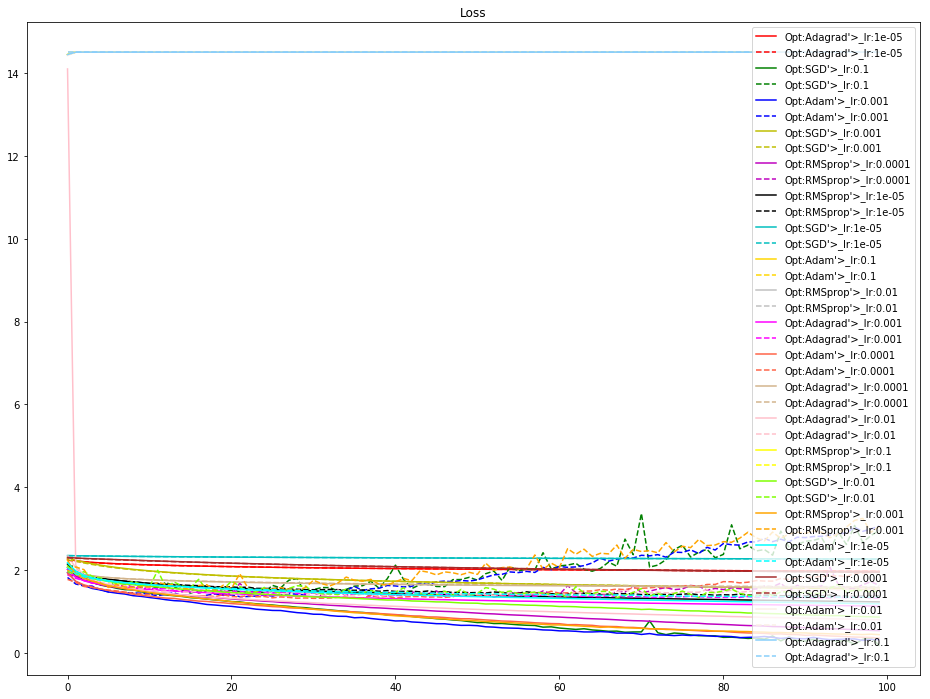

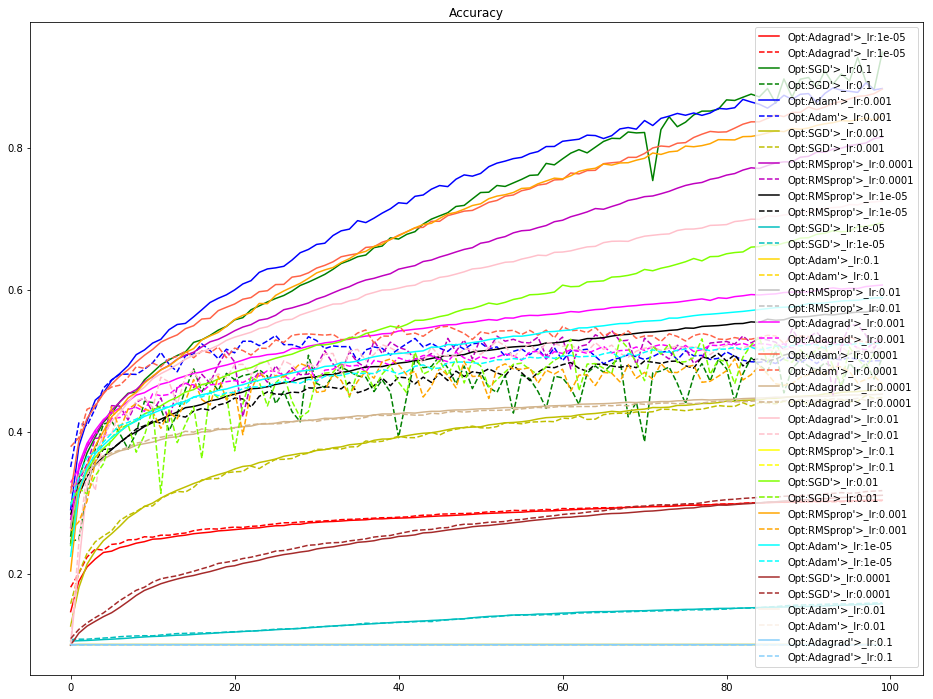

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
aa = list(results.keys())
"""
將實驗結果繪出
"""
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver" , "magenta", "tomato","tan","pink","yellow","chartreuse","orange","cyan","brown","linen","lightskyblue"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_accuracy'])),results[cond]['train_accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_accuracy'])),results[cond]['valid_accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

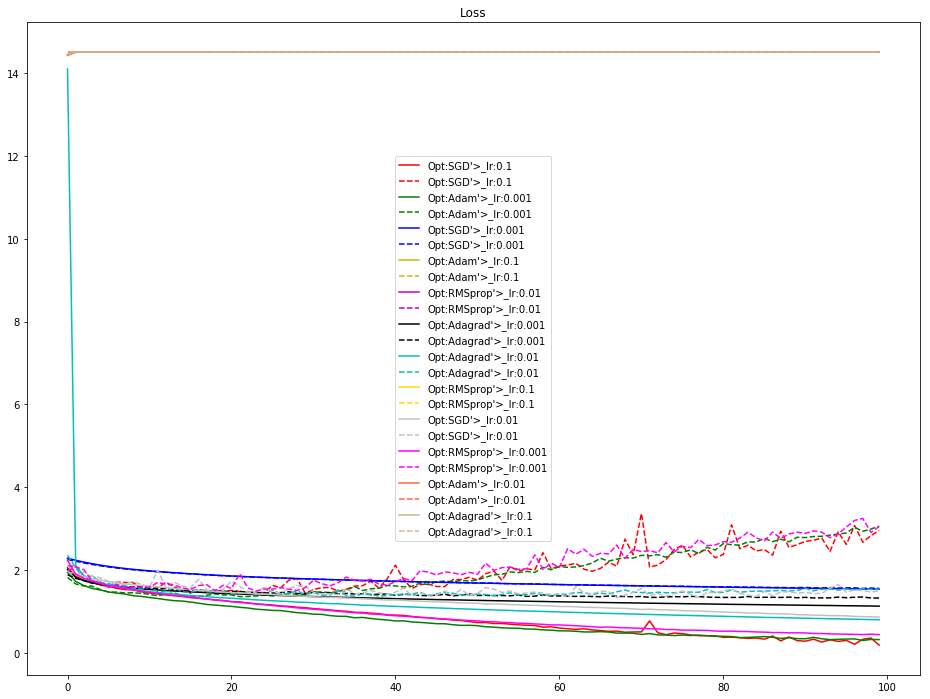

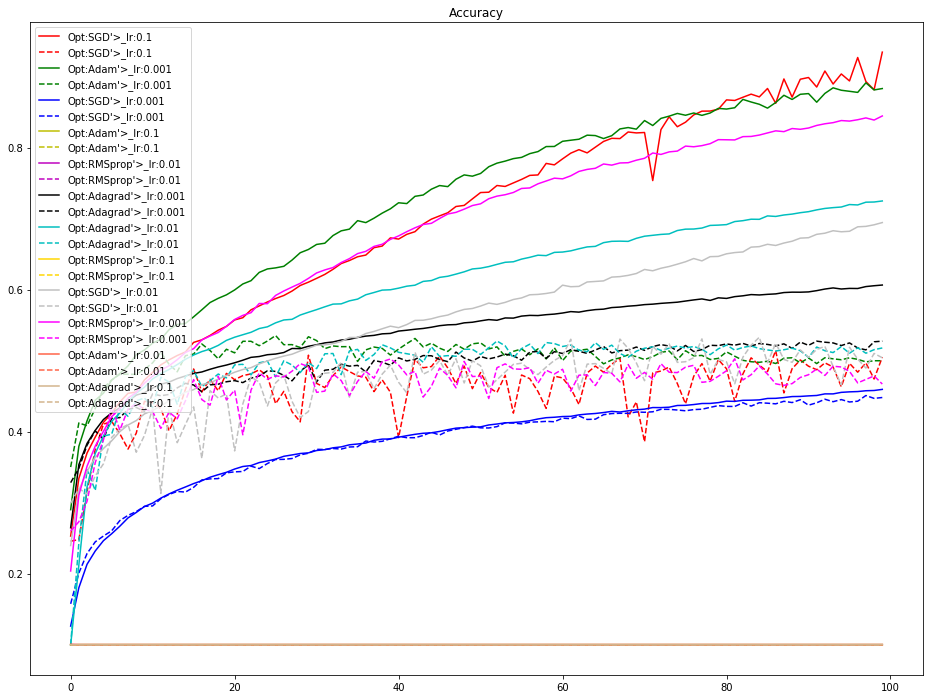

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
aa = list(results.keys())
aa.remove("Opt:SGD'>_lr:1e-05")
aa.remove("Opt:Adam'>_lr:1e-05")
aa.remove("Opt:Adagrad'>_lr:1e-05")
aa.remove("Opt:RMSprop'>_lr:1e-05")
aa.remove("Opt:SGD'>_lr:0.0001")
aa.remove("Opt:Adam'>_lr:0.0001")
aa.remove("Opt:Adagrad'>_lr:0.0001")
aa.remove("Opt:RMSprop'>_lr:0.0001")
"""
將實驗結果繪出
"""
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver" , "magenta", "tomato","tan","pink","yellow","chartreuse","orange","cyan","brown","linen","lightskyblue"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_accuracy'])),results[cond]['train_accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_accuracy'])),results[cond]['valid_accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

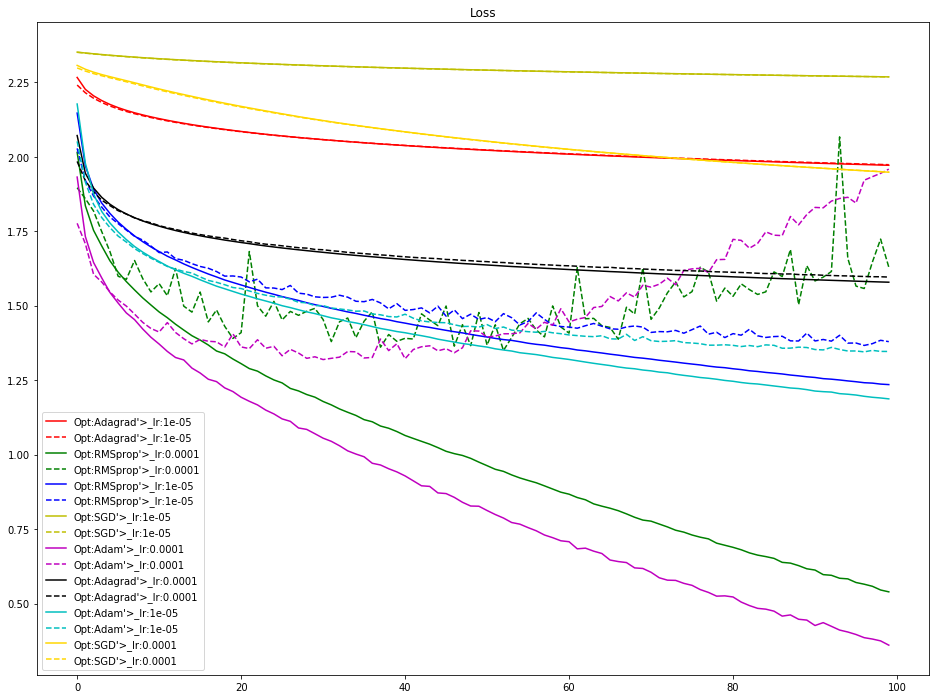

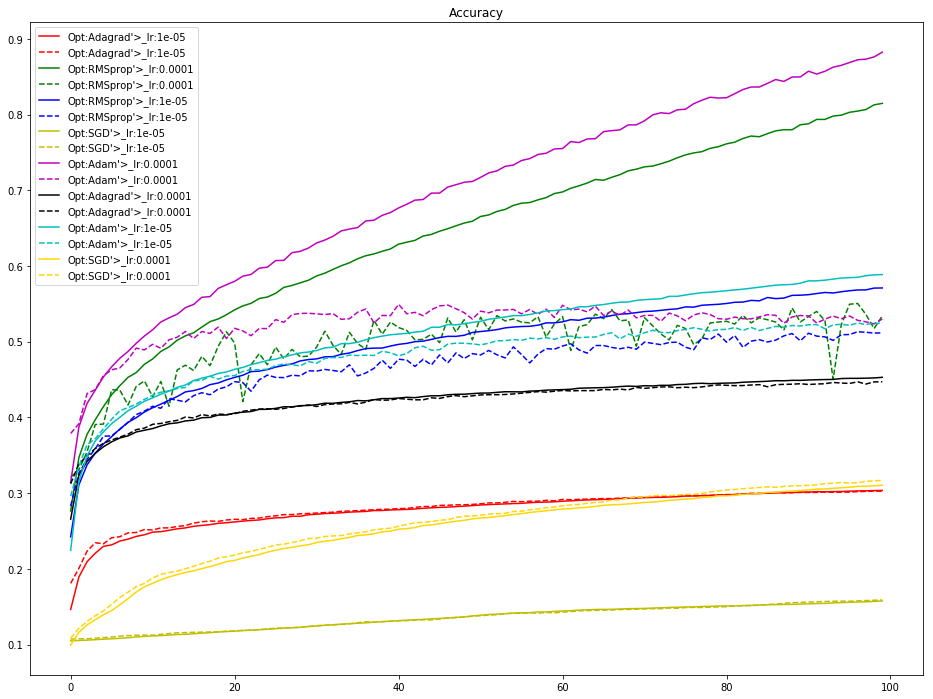

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
aa = list(results.keys())
aa.remove("Opt:SGD'>_lr:0.1")
aa.remove("Opt:Adam'>_lr:0.1")
aa.remove("Opt:Adagrad'>_lr:0.1")
aa.remove("Opt:RMSprop'>_lr:0.1")
aa.remove("Opt:SGD'>_lr:0.001")
aa.remove("Opt:Adam'>_lr:0.001")
aa.remove("Opt:Adagrad'>_lr:0.001")
aa.remove("Opt:RMSprop'>_lr:0.001")
aa.remove("Opt:SGD'>_lr:0.01")
aa.remove("Opt:Adam'>_lr:0.01")
aa.remove("Opt:Adagrad'>_lr:0.01")
aa.remove("Opt:RMSprop'>_lr:0.01")
"""
將實驗結果繪出
"""
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c" , "gold" ,"silver" , "magenta", "tomato","tan","pink","yellow","chartreuse","orange","cyan","brown","linen","lightskyblue"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(aa):
    plt.plot(range(len(results[cond]['train_accuracy'])),results[cond]['train_accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_accuracy'])),results[cond]['valid_accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()